Fuente de datos:
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

### Sobre este dataset
- **Age**: Edad del paciente
- **Sex**: Sexo del paciente
- **exang**: angina inducida por ejercicio (1 = sí; 0 = no)
- **ca**: número de vasos principales (0-3)
- **cp**: Tipo de dolor en el pecho
  - Valor 1: angina típica
  - Valor 2: angina atípica
  - Valor 3: dolor no anginoso
  - Valor 4: asintomático
- **trtbps**: presión arterial en reposo (en mm Hg)
- **chol**: colesterol en mg/dl obtenido a través de un sensor de IMC
- **fbs**: (glucemia en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)
- **rest_ecg**: resultados del electrocardiograma en reposo
  - Valor 0: normal
  - Valor 1: con anormalidad de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST de > 0.05 mV)
  - Valor 2: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes
- **thalach**: frecuencia cardíaca máxima alcanzada
- **target**: 0 = menor probabilidad de ataque cardíaco, 1 = mayor probabilidad de ataque cardíaco



## CRISP-DM
En este notebook, utilizaremos la metodología CRISP-DM (Cross-Industry Standard Process for Data Mining) la cual es utilizada para llevar a cabo proyectos de minería de datos y machine learning. Proporciona un marco estructurado que guía a los equipos a través de seis fases principales, asegurando un enfoque sistemático y repetible. Las fases de CRISP-DM son:

* Entendimiento de negocio: Definir los objetivos del proyecto y los requisitos desde una perspectiva empresarial.
* Entendimiento de los Datos: Recopilar datos iniciales, describir los datos, explorar los datos y verificar la calidad de los datos.
* Preparación de los Datos: Seleccionar, limpiar, construir, integrar y formatear los datos para crear el conjunto de datos final que se utilizará en el modelado.
* Modelado: Seleccionar y aplicar técnicas de modelado, calibrar los parámetros del modelo y evaluar los modelos.
* Evaluación: Evaluar los modelos para asegurarse de que cumplen con los objetivos del negocio y revisar los pasos realizados para construir los modelos.
* Despliegue: Implementar el modelo en un entorno operativo, planificar el monitoreo y el mantenimiento del modelo.

# 2. Entendimiento de los datos

In [1]:
# from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Montar Google Drive
# drive.mount('/content/drive')

# Ruta del archivo
# file_path = "/content/drive/My Drive/heart.csv"
file_path = "heart.csv"

In [3]:
# Cargar el dataset
df = pd.read_csv(file_path)

# Vista inicial de los datos
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print("\nInformación general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
print("\nDescripción estadística del dataset:")
df.describe()


Descripción estadística del dataset:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


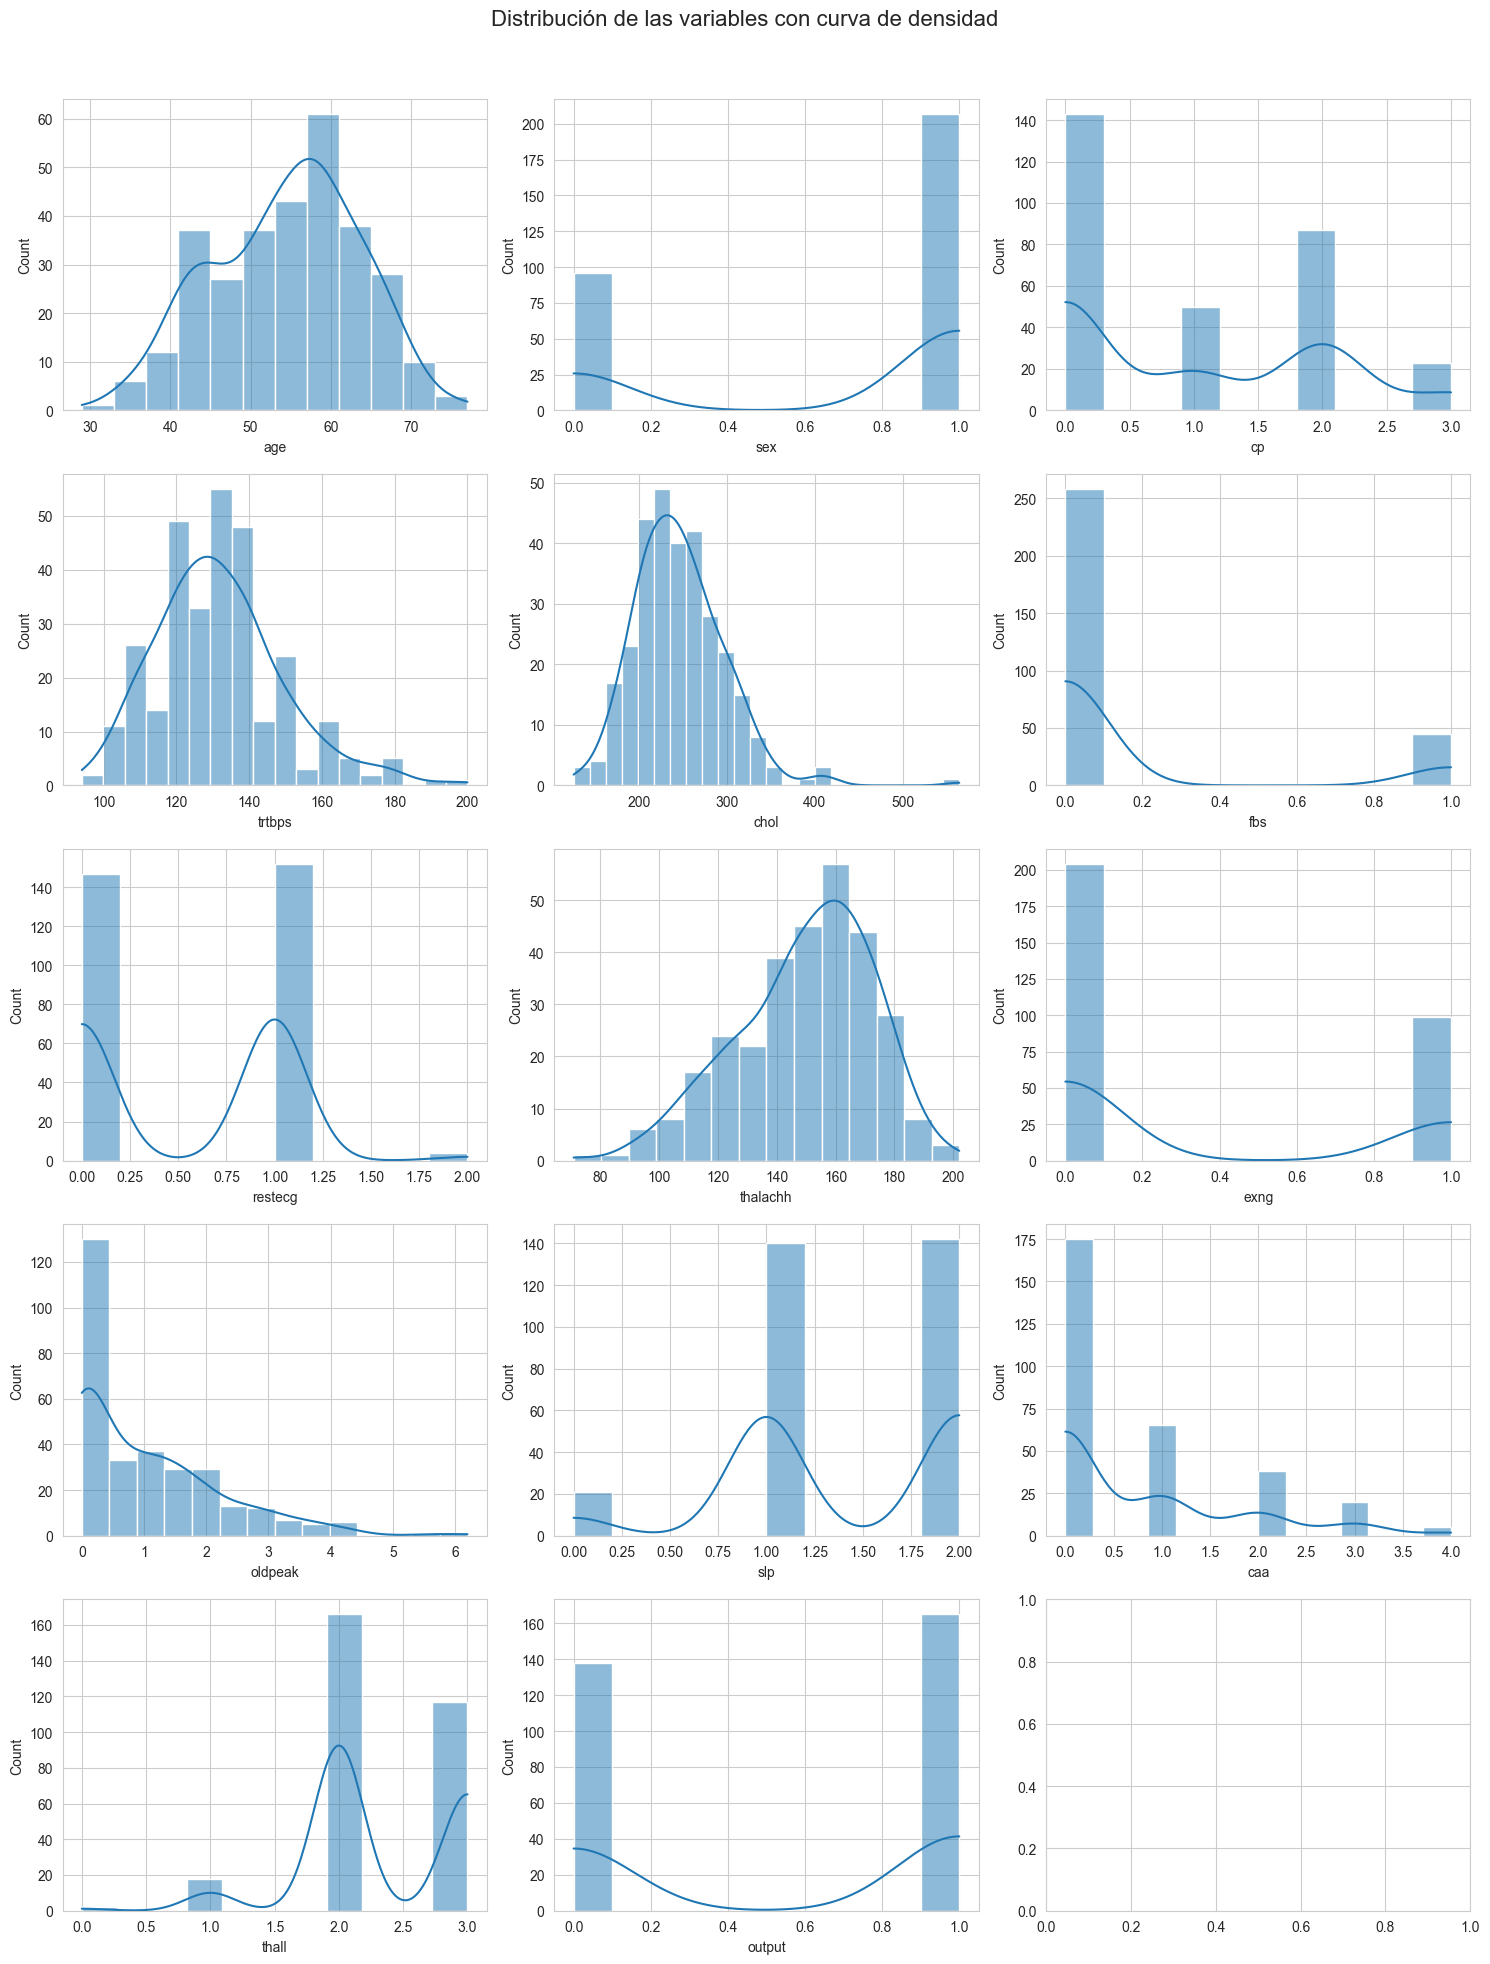

In [6]:
# Visualización univariante
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
fig.suptitle("Distribución de las variables con curva de densidad", fontsize=16)

for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i // 3, i % 3])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

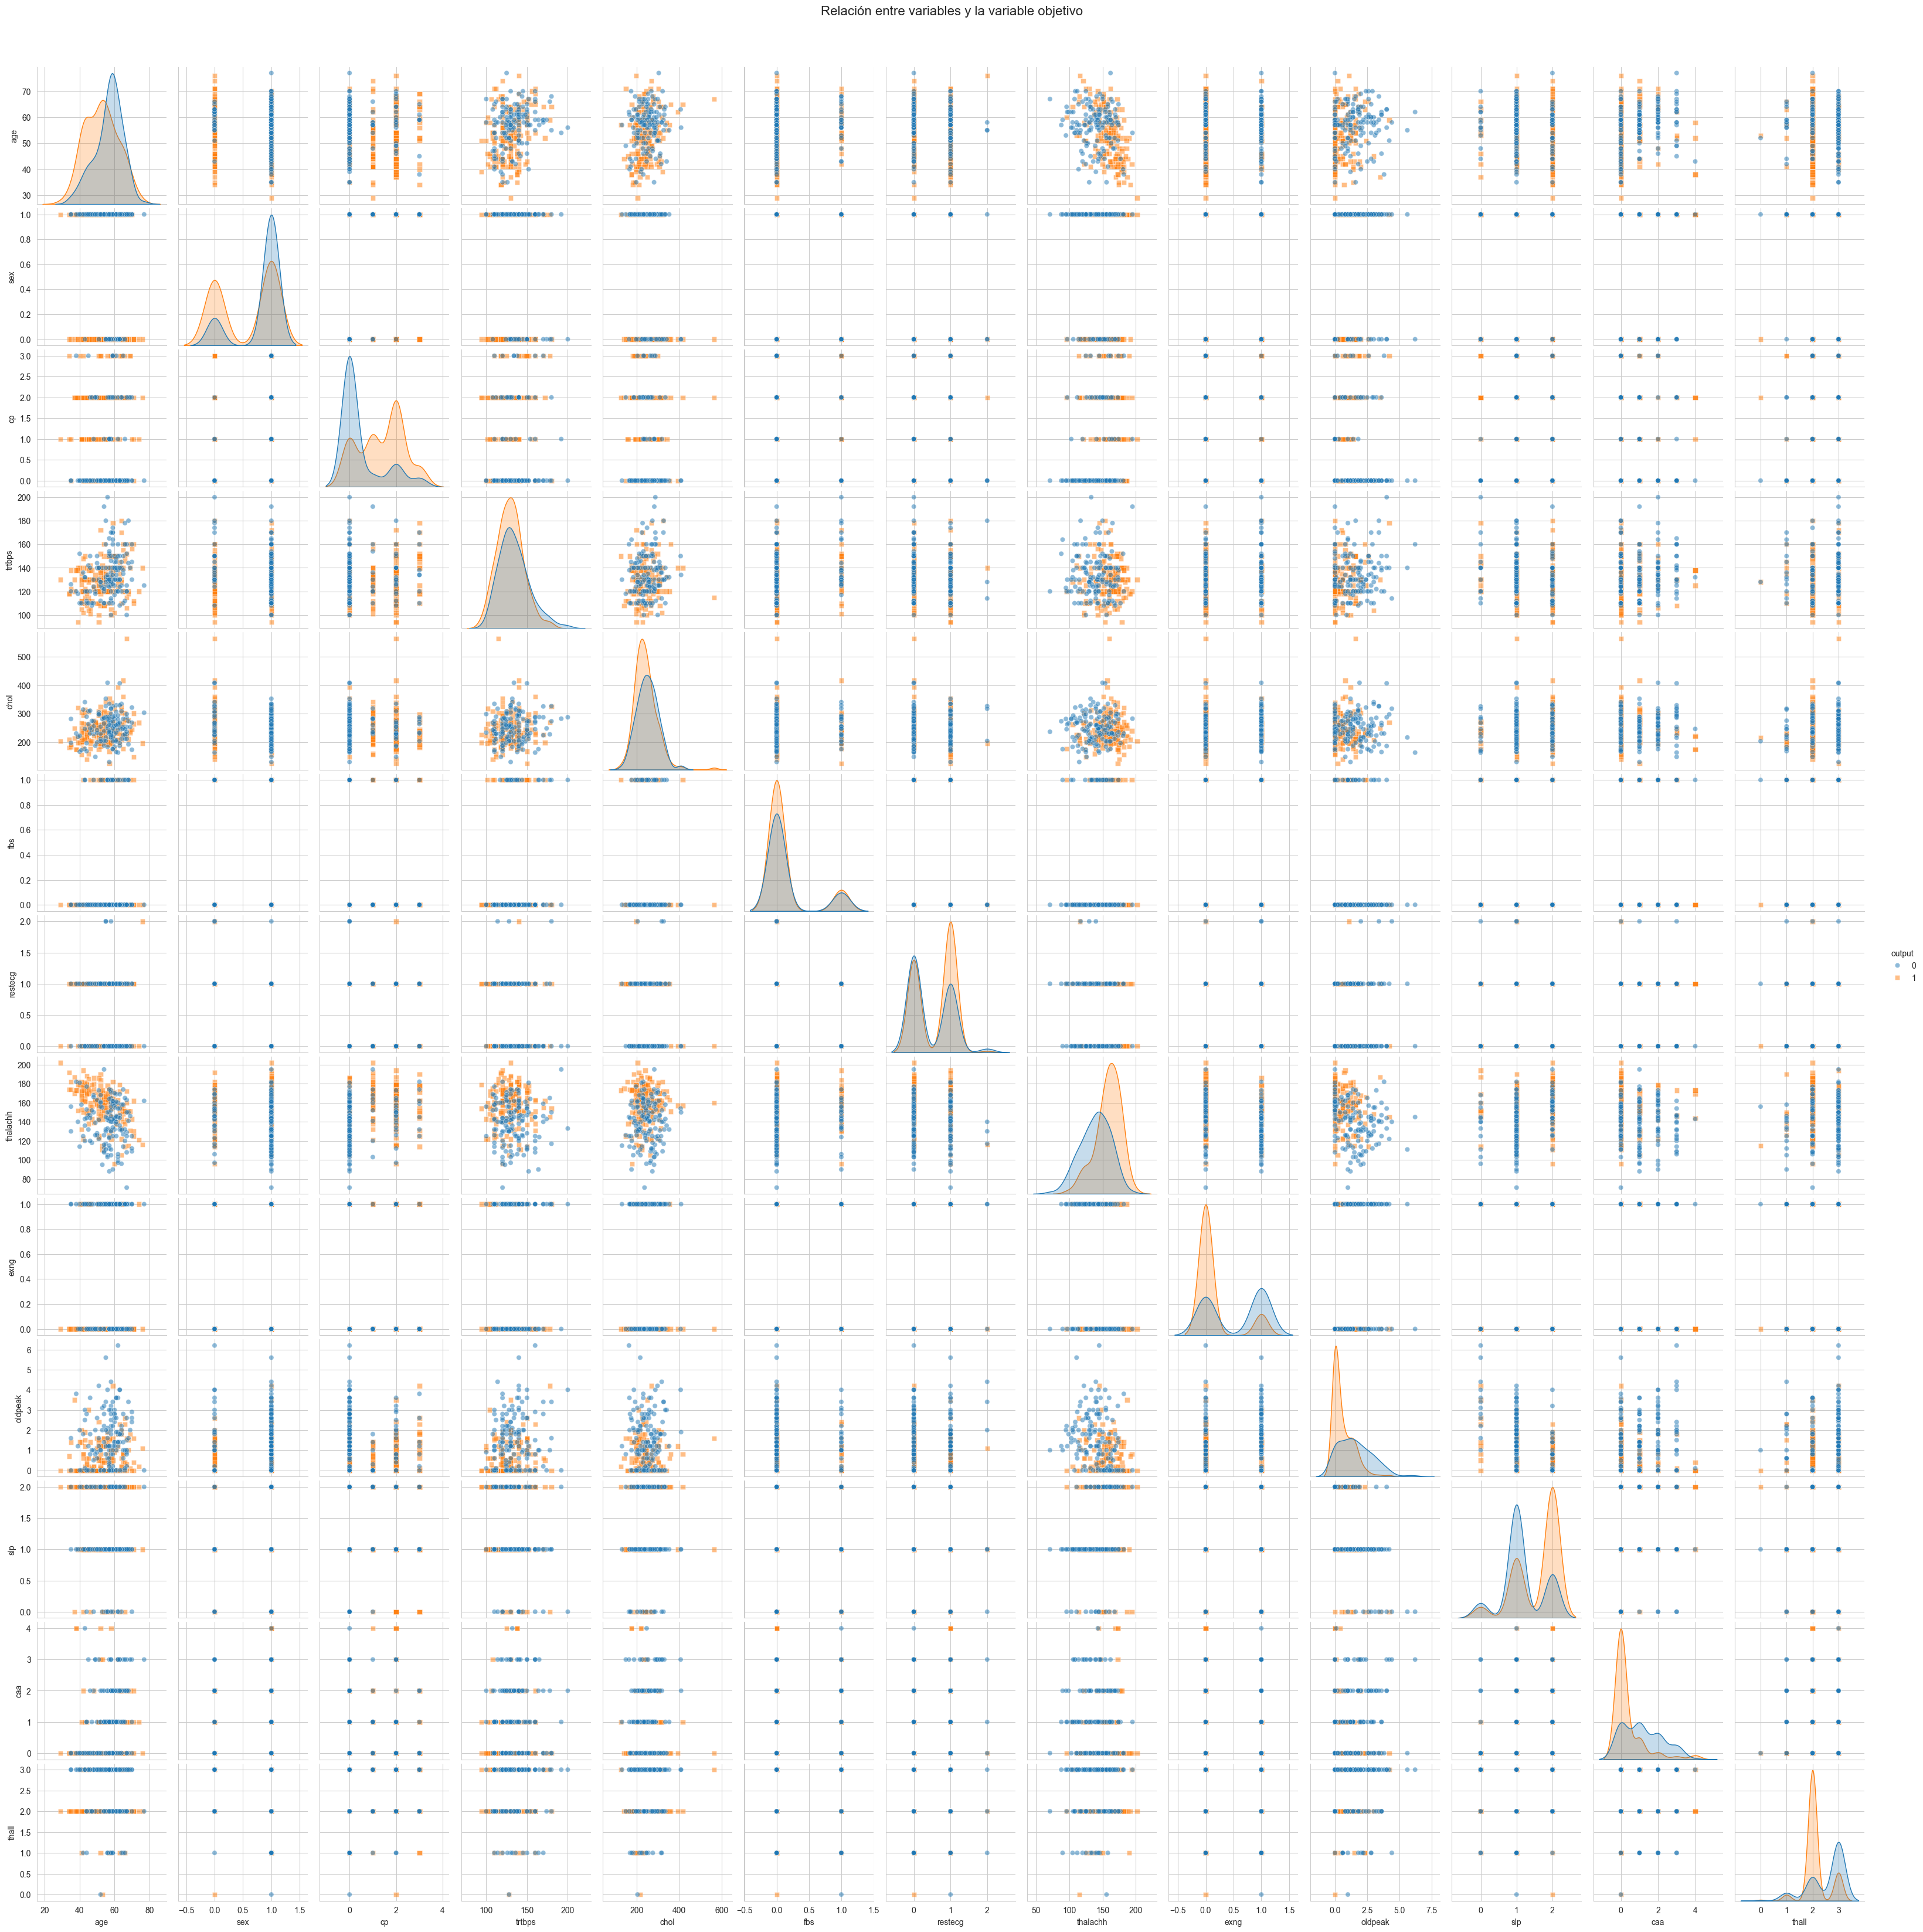

In [7]:
# Visualización bivariante
sns.pairplot(df, hue='output', diag_kind='kde', markers=["o", "s"], plot_kws={'alpha': 0.5})
plt.suptitle("Relación entre variables y la variable objetivo", y=1.02, fontsize=16)
plt.show()

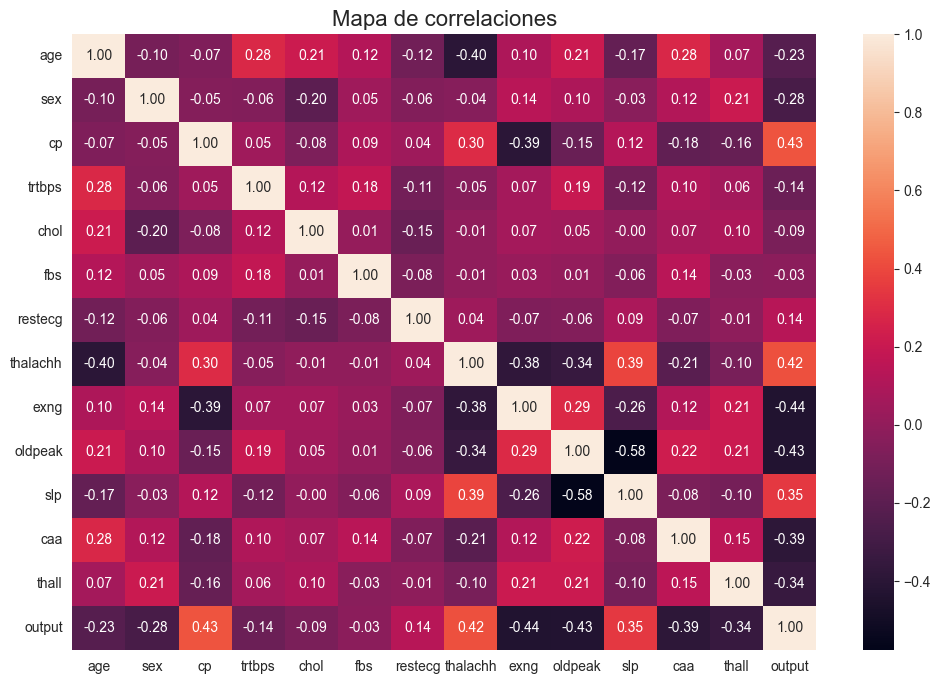

In [8]:
# Correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Mapa de correlaciones", fontsize=16)
plt.show()

In [9]:
# Function to calculate correlations with the target variable
def calcular_correlaciones(df, target):
    correlaciones = df.corr()[target].drop(target)
    return correlaciones

# Function to filter significant variables based on correlation thresholds
def filtrar_variables_significativas(correlaciones, lower_limit=0.2, upper_limit=0.8):
    variables_significativas = [
        var for var, corr in correlaciones.items() if lower_limit <= abs(corr) <= upper_limit
    ]
    return variables_significativas

In [10]:
correlaciones = calcular_correlaciones(df, 'output')
variables_significativas = filtrar_variables_significativas(correlaciones)

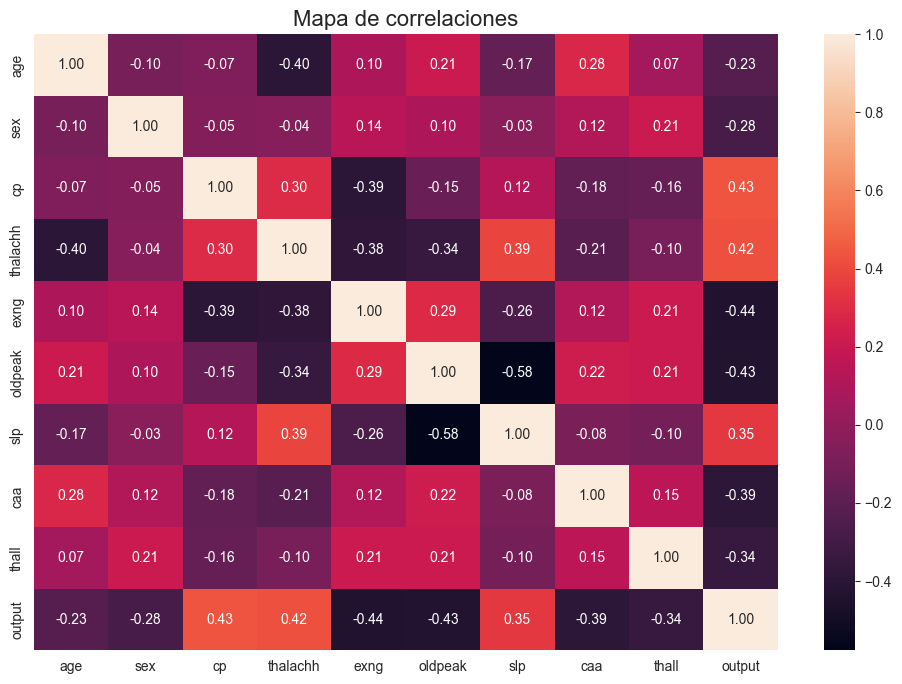

In [11]:
# Filtrar el DataFrame original para incluir solo las variables significativas y la variable objetivo
df_significativas = df[variables_significativas + ['output']]

# Mostrar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_significativas.corr(), annot=True, fmt=".2f")
plt.title("Mapa de correlaciones", fontsize=16)
plt.show()

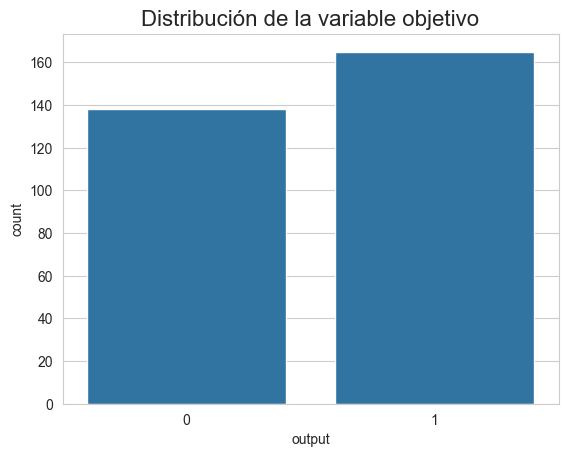

In [12]:
# Distribución de la variable objetivo
sns.countplot(data=df, x="output")
plt.title("Distribución de la variable objetivo", fontsize=16)
plt.show()

# 3. Preparación de datos:

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import warnings
import joblib

warnings.filterwarnings('ignore')

In [14]:
# Separar variables de entrada y salida
X = df.drop("output", axis=1)
y = df["output"]

In [15]:
# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']])

# Codificación de variables categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[['cp', 'thall', 'caa']])

# Guardar el scaler y el encoder
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(encoder, 'encoder.joblib')

['encoder.joblib']

In [16]:
# Concatenar características escaladas y codificadas
X_preprocessed = np.hstack((X_scaled, X_encoded))

# Balanceo de clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Crear un DataFrame con las columnas correctas
encoded_columns = encoder.get_feature_names_out(['cp', 'thall', 'caa'])
scaled_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
all_columns = np.concatenate((scaled_columns, encoded_columns))

data = pd.concat([pd.DataFrame(X_resampled, columns=all_columns), pd.Series(y_resampled, name="output")], axis=1)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. Modelación

## Modelacion sin PyCaret

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modelos base
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
}

# Entrenar y evaluar modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))



Logistic Regression Accuracy: 0.85
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.83      0.88      0.86        34

    accuracy                           0.85        66
   macro avg       0.85      0.85      0.85        66
weighted avg       0.85      0.85      0.85        66


Decision Tree Accuracy: 0.68
Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.72      0.56      0.63        32
           1       0.66      0.79      0.72        34

    accuracy                           0.68        66
   macro avg       0.69      0.68      0.68        66
weighted avg       0.69      0.68      0.68        66


Random Forest Accuracy: 0.79
Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
         

## Busqueda de hiperparametros

In [18]:
from sklearn.model_selection import GridSearchCV

# Ejemplo para Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
print("\nMejores hiperparámetros para Random Forest:")
print(grid_search.best_params_)



Mejores hiperparámetros para Random Forest:
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


## Modelacion con PyCaret

In [19]:
#!pip install pycaret
from pycaret.classification import *

In [20]:
# Configuración inicial
clf_setup = setup(data=data, target="output",
                  train_size=0.8,  # 80% para entrenamiento
                  normalize=True,  # Normalizar datos
                  session_id=42,  # Reproducibilidad
                  fold=5)  # Validación cruzada

# Comparar modelos
best_model = compare_models()
# Evaluar el mejor modelo
evaluate_model(best_model)


,Description,Value
0,Session id,42
1,Target,output
2,Target type,Binary
3,Original data shape,"(330, 16)"
4,Transformed data shape,"(330, 16)"
5,Transformed train set shape,"(264, 16)"
6,Transformed test set shape,"(66, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:39:43
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8562,0.8909,0.8718,0.8484,0.8579,0.7126,0.7167,0.2280
et,Extra Trees Classifier,0.8411,0.9057,0.8342,0.8536,0.8394,0.6823,0.6893,0.0380
lda,Linear Discriminant Analysis,0.8298,0.9162,0.8573,0.8134,0.8334,0.6599,0.6635,0.0100
ridge,Ridge Classifier,0.8261,0.9165,0.8499,0.8117,0.8286,0.6524,0.6563,0.0060
lr,Logistic Regression,0.8260,0.9093,0.8570,0.8067,0.8300,0.6520,0.6556,0.2880
rf,Random Forest Classifier,0.8106,0.8897,0.8031,0.8214,0.8083,0.6211,0.6266,0.0420
ada,Ada Boost Classifier,0.7917,0.8597,0.7877,0.7985,0.7907,0.5834,0.5870,0.0200
lightgbm,Light Gradient Boosting Machine,0.7880,0.8718,0.7892,0.7885,0.7869,0.5765,0.5794,0.0380
gbc,Gradient Boosting Classifier,0.7879,0.8854,0.7726,0.8022,0.7846,0.5754,0.5789,0.0240
svm,SVM - Linear Kernel,0.7729,0.8635,0.7202,0.8101,0.7598,0.5461,0.5526,0.0100


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
# Comparar modelos
top_models = compare_models(n_select=5)

# Optimizar los 5 modelos seleccionados
tuned_models = [tune_model(model) for model in top_models]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:39:51
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8562,0.8909,0.8718,0.8484,0.8579,0.7126,0.7167,0.0200
et,Extra Trees Classifier,0.8411,0.9057,0.8342,0.8536,0.8394,0.6823,0.6893,0.0380
lda,Linear Discriminant Analysis,0.8298,0.9162,0.8573,0.8134,0.8334,0.6599,0.6635,0.0080
ridge,Ridge Classifier,0.8261,0.9165,0.8499,0.8117,0.8286,0.6524,0.6563,0.0080
lr,Logistic Regression,0.8260,0.9093,0.8570,0.8067,0.8300,0.6520,0.6556,0.0080
rf,Random Forest Classifier,0.8106,0.8897,0.8031,0.8214,0.8083,0.6211,0.6266,0.0400
ada,Ada Boost Classifier,0.7917,0.8597,0.7877,0.7985,0.7907,0.5834,0.5870,0.0200
lightgbm,Light Gradient Boosting Machine,0.7880,0.8718,0.7892,0.7885,0.7869,0.5765,0.5794,0.0380
gbc,Gradient Boosting Classifier,0.7879,0.8854,0.7726,0.8022,0.7846,0.5754,0.5789,0.0200
svm,SVM - Linear Kernel,0.7729,0.8635,0.7202,0.8101,0.7598,0.5461,0.5526,0.0100


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:39:54
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8491,0.9245,0.7308,0.9500,0.8261,0.6967,0.7155
1,0.9057,0.9024,1.0000,0.8387,0.9123,0.8119,0.8267
2,0.8491,0.9003,0.8519,0.8519,0.8519,0.6980,0.6980
3,0.8113,0.8803,0.7778,0.8400,0.8077,0.6230,0.6248
4,0.8846,0.9283,0.9231,0.8571,0.8889,0.7692,0.7715
Mean,0.8599,0.9072,0.8567,0.8675,0.8574,0.7198,0.7273
Std,0.0326,0.0175,0.0970,0.0418,0.0387,0.0653,0.0683


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:39:54
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7547,0.8989,0.7308,0.7600,0.7451,0.5089,0.5093
1,0.8113,0.8974,0.8846,0.7667,0.8214,0.6236,0.6308
2,0.7736,0.8789,0.7037,0.8261,0.7600,0.5483,0.5546
3,0.7736,0.8604,0.7407,0.8000,0.7692,0.5477,0.5492
4,0.8846,0.9260,0.9231,0.8571,0.8889,0.7692,0.7715
Mean,0.7996,0.8923,0.7966,0.8020,0.7969,0.5995,0.6031
Std,0.0463,0.0219,0.0892,0.0364,0.0527,0.0926,0.0929


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:39:57
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8491,0.9416,0.8077,0.8750,0.8400,0.6976,0.6996
1,0.8491,0.9088,0.9231,0.8000,0.8571,0.6989,0.7069
2,0.8491,0.8932,0.8519,0.8519,0.8519,0.6980,0.6980
3,0.7736,0.8632,0.7778,0.7778,0.7778,0.5470,0.5470
4,0.8846,0.9601,0.9231,0.8571,0.8889,0.7692,0.7715
Mean,0.8411,0.9134,0.8567,0.8324,0.8431,0.6821,0.6846
Std,0.0364,0.0344,0.0591,0.0370,0.0365,0.0730,0.0740


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:39:57
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8113,0.9473,0.8462,0.7857,0.8148,0.6230,0.6248
1,0.8868,0.9131,1.0000,0.8125,0.8966,0.7745,0.7949
2,0.7925,0.8932,0.8148,0.7857,0.8000,0.5845,0.5849
3,0.7736,0.8761,0.7407,0.8000,0.7692,0.5477,0.5492
4,0.9038,0.9601,0.9231,0.8889,0.9057,0.8077,0.8083
Mean,0.8336,0.9179,0.8650,0.8146,0.8373,0.6675,0.6724
Std,0.0521,0.0317,0.0893,0.0385,0.0542,0.1042,0.1082


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:39:58
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8113,0.9387,0.8077,0.8077,0.8077,0.6225,0.6225
1,0.8679,0.9117,0.9615,0.8065,0.8772,0.7367,0.7501
2,0.8113,0.8860,0.8519,0.7931,0.8214,0.6220,0.6238
3,0.7547,0.8590,0.7407,0.7692,0.7547,0.5096,0.5100
4,0.8846,0.9467,0.9231,0.8571,0.8889,0.7692,0.7715
Mean,0.8260,0.9084,0.8570,0.8067,0.8300,0.6520,0.6556
Std,0.0463,0.0327,0.0791,0.0288,0.0489,0.0927,0.0956


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
# Evaluar cada modelo optimizado y seleccionar el mejor
best_model = None
best_combined_score = 0

for tuned_model in tuned_models:
    evaluate_model(tuned_model)
    metrics = pull().iloc[0]
    f1_score = metrics['F1']
    accuracy = metrics['Accuracy']
    recall = metrics['Recall']

    # Calcular un puntaje combinado
    combined_score = (f1_score + accuracy + recall) / 3

    if combined_score > best_combined_score:
        best_combined_score = combined_score
        best_model = tuned_model


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [23]:
best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='distance')

In [24]:
best_combined_score

0.8089

In [25]:
# Entrenar el modelo final con todos los datos
final_model = finalize_model(best_model)  # Selecciona el mejor modelo optimizado

In [26]:
from pycaret.classification import save_model

# Guardar el modelo
save_model(final_model, "mejor_modelo_pipeline")


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'trtbps', 'chol',
                                              'thalachh', 'oldpeak', 'cp_1',
                                              'cp_2', 'cp_3', 'thall_1',
                                              'thall_2', 'thall_3', 'caa_1',
                                              'caa_2', 'caa_3', 'caa_4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan...
                                                               keep_empty_features=Fa

In [27]:
import joblib

# Guardar el pipeline con el modelo
joblib.dump(final_model, 'mejor_modelo_pipeline.joblib')

['mejor_modelo_pipeline.joblib']

## FAST API con PyCared

In [31]:
from fastapi import FastAPI
import pandas as pd
from pycaret.classification import load_model, predict_model

# Cargar el modelo guardado
model = load_model("mejor_modelo_pipeline")

# Inicializar la aplicación FastAPI
app = FastAPI()

@app.post("/predict/")
def predict(data: dict):
    """
    Endpoint para predecir la salida de un modelo entrenado.
    """
    # Convertir los datos de entrada en un DataFrame
    input_data = pd.DataFrame([data])

    # Realizar la predicción
    prediction = predict_model(model, data=input_data)

    # Retornar la predicción
    return {
        "prediction_label": prediction["Label"][0],
        "prediction_score": prediction["Score"][0],
    }


Transformation Pipeline and Model Successfully Loaded


## FastAPI con Joblib

In [ ]:
from fastapi import FastAPI
import pandas as pd
import joblib

# Cargar el modelo guardado
model = joblib.load('mejor_modelo_pipeline.pkl')

# Inicializar la aplicación FastAPI
app = FastAPI()

@app.post("/predict/")
def predict(data: dict):
    """
    Endpoint para predecir la salida de un modelo entrenado.
    """
    # Convertir los datos de entrada en un DataFrame
    input_data = pd.DataFrame([data])

    # Realizar la predicción
    prediction = model.predict(input_data)
    prediction_proba = model.predict_proba(input_data)

    # Retornar la predicción
    return {
        "prediction_label": int(prediction[0]),
        "prediction_score": float(prediction_proba[0][1]),
    }

Vamos a crear una API REST con FastAPI que reciba datos de entrada en formato JSON y devuelva una predicción en formato JSON.